[极客教程-sympy](https://geek-docs.com/python/python-tutorial/python-sympy.html)

In [3]:
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
%matplotlib inline

In [4]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import sys
import random

## 导包

In [29]:
from sympy import pi, E, I, oo
from sympy import simplify,exp,sqrt
from sympy.plotting import plot


# 数学基础

Rational值
***
SymPy 具有用于处理有理数的Rational。 有理数是可以表示为两个整数（分子 p 和非零分母 q）的商或分数 p / q 的任何数字。

In [30]:
from sympy import Rational

r1 = Rational(1/10)
r2 = Rational(1/10)
r3 = Rational(1/10)
val = (r1 + r2 + r3) * 3
r1
r2
val
val.evalf()
val2 = (1/10 + 1/10 + 1/10) * 3
val2

In [31]:
from sympy import Mul

a = sqrt(2)
b = sqrt(2)

Mul(a,  b, evaluate=False) 
'equals to '
a * b

'equals to '

# 符号计算

## 定义符号和符号运算
* Symbol
* symbols

In [32]:
from sympy import Symbol,symbols

In [33]:
x = Symbol('x')
a = Symbol('x')
x
2*x+1
2*a+1

In [34]:
x,y,z=symbols("x y z") # 要以空格或逗号分隔
x
y
z

## 分解和展开表达式
* fractor(): 分解表达式
* expand(): 展开表达式

In [35]:
from sympy import factor,expand
x,y=symbols("x y")
expr = x**2-y**2
factors = factor(expr)
factors
expand(factors)

## 简化表达式
* simplify()  
    * 简化表达式
    * 将字符串转化为数学表达式

In [36]:
from sympy import sin, cos
expr1 = sin(x) / cos(x)
simplify(expr1)
expr_str = "3*x*x+2*x*y+y*y"
simplify(expr_str)

## 比较表达式
* equals()

In [37]:
from sympy import sin, cos

x = Symbol('x')

a = cos(x)**2 - sin(x)**2
b = cos(2*x)

a.equals(b)
# we cannot use == operator
a == b

True

False

## 求值表达式
* evalf()

In [38]:
pi.evalf()
pi.evalf(30)


## 用值代替符号
* subs()

* Float, Integer, Integers

In [39]:
from sympy import Float, Integer, Integers, S
Float("3.14")
Integer("3")
type(Float("3.14"))
# help(Integers)
S.Reals
S.Integers
S.Zero
S.UniversalSet
S.Pi
S.One
S.Infinity

sympy.core.numbers.Float

In [40]:
x, y = symbols('x y')

expr = 3*x*x+2*x*y+y*y
expr1 = expr.subs({x:(1-y)})
expr.subs({x:2, y:3})

(1/x).evalf(subs={x: 0.3}, n=21) # n 总位数，精度不够
# (1/x).subs({x: 3.0})
# (1/x).subs({x: 3.0}, n=21)# 位数不足，与上面相同
# (1/x).subs({x: 3.0}).evalf(21)# 不好
expr1
simplify(expr1)


## 区间操作
* Interval

In [41]:
from sympy import Interval, Union, Intersection,Complement,UniversalSet,EmptySet
Interval(0, 1).complement(S.Reals)
Interval(0, 1)
0.5 in Interval(0, 1)
Union(Interval(0, 1), Interval(2, 3)).sup
Union(Interval(0, 1), Interval(2, 3))
Intersection(Interval(0, 1), Interval(1, 3))
Interval(1, 3).intersect(Interval(1, 2))
Complement(Interval(1, 3), Interval(1, 2))
Interval(1, 2).complement(Interval(1, 3))
S.Integers.intersect(Interval(-4, 4))
Interval(-4, 4).complement(S.Integers)
Interval(0, 1).measure # 勒贝格常数
Union(Interval(0, 1), Interval(2, 3)).measure

True

ℤ \ [-4, 4]

In [42]:
# infimum 下确界.inf
Interval(0, 1).inf
# supremum 上确界
Interval(2, 3).sup
1 in Interval(0, 1).interior
Interval(0, 1).closure # 闭集
Interval(0, 1).interior  # 开集
Interval(0, 1).boundary # 边界
Interval(0, 1).boundary.interior

False

## 表达式乘法
* \*号

In [43]:
expr1 = x**2+2*x
expr2 = x**3+2*x**2+3*x
expr = expr1*expr2
expr
simplify(expr)
expand(expr)

## 使表达式整齐输出
* pprint()
* pretty()

In [44]:
from sympy import pprint, init_printing, pretty
init_printing(use_unicode=True) # 对于某些字符，我们需要启用 unicode 支持。
expr = x*x+2*x*y+y*y
expr
pprint(expr)
pretty(expr) # 不太好用

 2            2
x  + 2⋅x⋅y + y 


' 2            2\nx  + 2⋅x⋅y + y '

In [45]:
from sympy import init_printing
expr = 1+2*x+2*x**2
# pprint(expr)
init_printing(order="grlex") # 有问题，没什么作用
pprint(expr)

   2          
2⋅x  + 2⋅x + 1


## 运算符

In [46]:
from sympy import Add,  Mul
x,y = symbols("x y")
Add(x,y)
Mul(x,y)

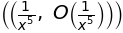

In [47]:
from sympy import add, mul, div
from sympy.abc import a, x, y
# help(add)
(3*y+7 + 3*x +4*x*y).as_coeff_add()
(3*x + a*x + 4).as_coefficients_dict() # 系数字典
(3*x +3 + 3*sqrt(2)).as_content_primitive()
(7 + 9*I).as_real_imag()
(3*x - 2*y + 5).as_two_terms()
(x + 1 + 1/x**5).extract_leading_order(x)
(2*x + 4*y).primitive()
((2 + 2*x)*x + 2).as_content_primitive()

In [48]:
from sympy import symbols, Wild, Basic
a, b, c = symbols('a b c')
x = Wild('x')
x
Basic(a + x, x).matches(Basic(a + b, c)) is None
Basic(a + x, x).matches(Basic(a + b + c, b + c))


True

In [49]:
from sympy import summation, factorial

In [50]:
n = symbols('n')
# 求和
s = summation(1 / factorial(n), (n, 1, 100))
s.evalf()
# print(s.evalf())
# 阶乘
a = factorial(5)
# print(a)
'''
evalf'''
a = sympy.Symbol('a')
(1 / a).evalf(subs={a: 3}, n=10)
# print((1 / a).evalf(subs={a: 3}, n=10))  # 值代换，保留小数位数

# 欧拉公式和复数
# E**(I*pi) + 1
x = symbols("x", real=True)
y = expand(E ** (I * x), complex=True)


'\nevalf'

# 序列
* sequence()

In [51]:
from sympy import sequence
n = Symbol('n')
s = sequence(x**2, (x, 1, 10))
s
list(s)
s.formula
s.start
s.stop
s.length
summation(s.formula, (x, s.start, s.stop))
s1 = sequence((1, 2, 3, 4), (n, 0, 6))
list(s1)


* SeqPer

In [52]:
from sympy import SeqPer
k = sympy.symbols('k')
s = SeqPer((k,k**2,k**3),(k,1,oo))
s
s.periodical # 周期序列
s.period # 周期序列长度
s.coeff(2) # 在自变量取特定值时的值
s1 = SeqPer((1,2,3),(k,1,10))
s1[:]

* SeqFormula

In [53]:
from sympy import SeqFormula
n = Symbol('n')
s = SeqFormula(n**3,(n,-oo,0))
s
s.formula
# s[:]

In [54]:
sequence((n,n**2,n**3), (n, 1, 10))
SeqPer((k,k**2,k**3),(k,1,oo))
SeqFormula((n**2,n**3),(n,-oo,0))

In [55]:
from sympy import SeqAdd
SeqAdd(SeqPer((1, 2), (n, 0, oo)), S.EmptySequence)
SeqAdd(SeqPer((1, 2), (n, 0, oo)), SeqPer((1, 2), (n, 3, oo)))
# SeqPer((1, 2), (n, 0, 5))
# SeqPer((1, 2), (n, 4, 10))
SeqAdd(SeqPer((1, 2), (n, 0, 5)), SeqPer((1, 2), (n, 4, 10)))
SeqAdd(SeqPer((1, 2), (n, 0, oo)), SeqFormula(n ** 2, (n, 0, oo)))
SeqAdd(SeqFormula(n ** 3), SeqFormula(n ** 2))
SeqAdd(SeqPer((1, 2), (n, 0, oo)), SeqFormula(n ** 2, (n, 0, oo)))

In [56]:
from sympy import SeqMul
SeqMul(SeqPer((1, 2), (n, 0, oo)), S.EmptySequence)
SeqMul(SeqPer((1, 2), (n, 0, 5)), SeqPer((1, 2), (n, 5, 10)))
SeqMul(SeqPer((1, 2), (n, 0, oo)), SeqFormula(n ** 2))
SeqMul(SeqFormula(n ** 3), SeqFormula(n ** 2))


# 函数

## 常见函数

* 误差函数erf()
    $$erf(x)=\frac{2}{\sqrt{\pi}} \int_0^x {e^{-\eta^{2}} d\eta}$$
* 正弦积分函数Si()
    $$Si(x)=\int_0^x{\frac{\sin(t)}{t}dt}\quad x>0$$
* 伽玛函数gamma()
    $$Gamma(x)=\int_0^\infty{t^{x-1}e^{-t}dx\quad(x>0)}$$

In [57]:
from sympy import erf, Si, gamma
#误差函数
erf(0.5).evalf(n=10)
#正弦积分函数
Si(1).evalf(n=10)
#伽玛函数
gamma(5)

## 分段函数
* Piecewise

In [59]:
from sympy import Piecewise, pi
x = symbols('x')

⎧x   for x > -1 ∧ x < 1
⎨                      
⎩-x  for x > 1 ∨ x < -1

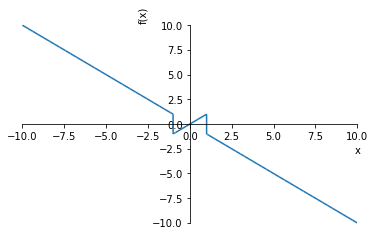

In [60]:
f = Piecewise((x,(x>-1) & (x<1)),(-x,(x<-1) | (x>1))) 
f
plot(f)

⎧x   for x > -1 ∧ x < 1
⎨                      
⎩-x  for x > -3 ∧ x < 0

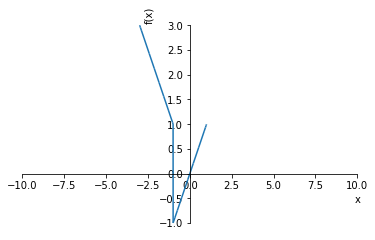

In [61]:
f = Piecewise((x,(x>-1) & (x<1)),(-x,(x<0) & (x>-3))) # 区间有重叠不报错，但不对
f
plot(f)


In [62]:
f = Piecewise((1,x>0),(0,(x>=0) & (x<=0)),(-1,x<0)) # ==无效，改用集合交集表示

# f = Piecewise((1,x>0),(0,(x==0)),(-1,x<0)) # ==无效
f
# plot(f) # 带有一个点的分段函数无法这样plot
f.subs({x:0})

⎧1   for x > 0
⎪             
⎨0   for x = 0
⎪             
⎩-1  for x < 0

⎧0   for x < -1
⎪              
⎪ x            
⎨ℯ   for x ≤ 1 
⎪              
⎪x   otherwise 
⎩              

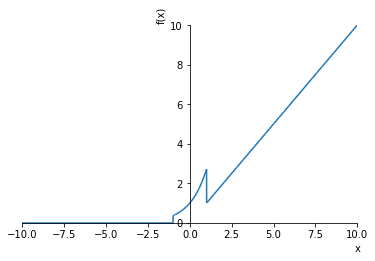

In [63]:
f = x
# g = log(x) # 无法plot
g = exp(x)
p = Piecewise((0, x < -1), (g, x <= 1), (f, True)) # True代表otherwise
p
plot(p)

## 解方程

In [64]:
from sympy import solve
x, y, a, b, c = symbols("x y a b c")
expr = x**2-4
solve(expr)

### 解二次方程

In [65]:
x, y, a, b, c = symbols("x y a b c")
expr = x**2-4*x+3
solve(expr,dict=True)

### 用其它变量求解一个变量

[{x: (b - sqrt(-4*a*c + b**2))/(2*a)}, {x: (b + sqrt(-4*a*c + b**2))/(2*a)}]


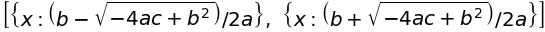

In [66]:
expr = a*x**2-b*x+c
result = solve(expr,x,dict=True)
print(result)
result 

### 解线性方程组

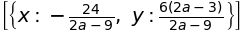

In [67]:
expr1= a*x+3*y-6
expr2 = 3*x+2*y-12
solve((expr1,expr2),(x,y),dict=True)

## sympy包绘图

### 单函数图形绘制

In [68]:
from sympy.plotting import plot
x = Symbol('x')

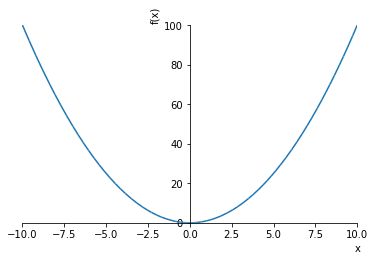

In [69]:
plot(x**2)

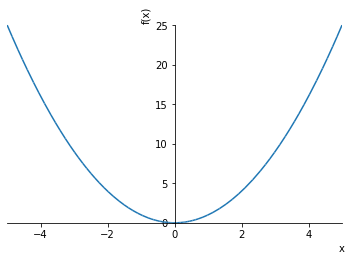

In [70]:
y = x**2
plot(y,(x,-5,5))

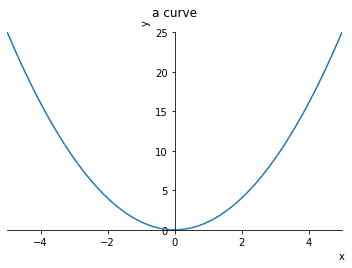

In [71]:
plot(y,(x,-5,5), title="a curve",xlabel="x",ylabel="y",show=True)

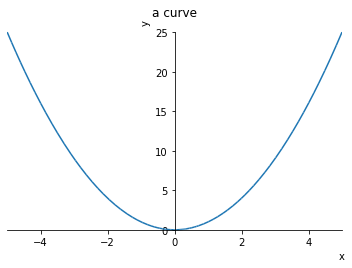

In [72]:
# 保存
p = plot(y,(x,-5,5), title="a curve",xlabel="x",ylabel="y",show=False)
p.save(r"./saves/curve.png")

### 多函数图形绘制

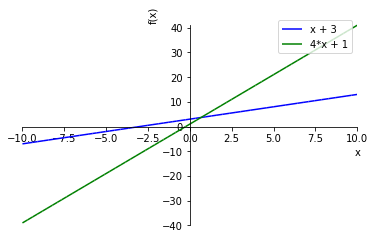

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_dim',
 'adaptive',
 'depth',
 'end',
 'expr',
 'flag',
 'get_color_array',
 'get_points',
 'get_segments',
 'is_2Dline',
 'is_3D',
 'is_3Dline',
 'is_3Dsurface',
 'is_contour',
 'is_implicit',
 'is_line',
 'is_parametric',
 'label',
 'line_color',
 'nb_of_points',
 'only_integers',
 'start',
 'steps',
 'var',
 'xscale']

In [73]:
p = plot(x+3,4*x+1,legend=True,show=False)
p[0].line_color='b'
p[1].line_color='g'
p.show()
# dir(p)
dir(p[0]) # 查看对象属性

In [74]:
from sympy import log,exp,power

log 不能作图

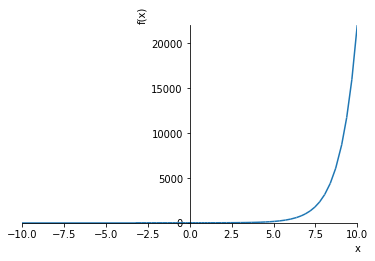

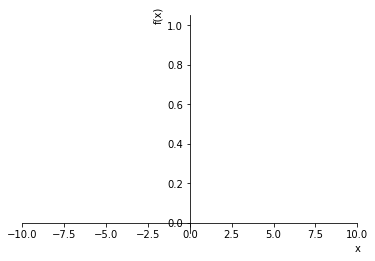

In [75]:
log(x)
plot(exp(x))
plot(log(x))

In [76]:
solve(log(x)-4)

### 级数求和
* summation

In [77]:
from sympy import summation
x,n,s= symbols("x n s")
s = summation(x**n/n,(n,1,5))
s
s.subs({x:1})

### 解单变量不等式


In [78]:
from sympy import Poly, solve_poly_inequality
ineq_obj = -x**2+4<0
# dir(inen_obj)
lhs = ineq_obj.lhs
rel = ineq_obj.rel_op
p = Poly(lhs, x)
p
lhs
rel
solve_poly_inequality(p,rel)

'<'

In [79]:
from sympy import Poly, solve_rational_inequalities
ineq_obj = ((x-1)/(x+2))>0
# dir(inen_obj)
lhs = ineq_obj.lhs
numer,denom = lhs.as_numer_denom()
p1 = Poly(numer)
p2 = Poly(denom)
rel = ineq_obj.rel_op
lhs
rel
p1
p2
solve_rational_inequalities([[((p1,p2),rel)]])

'>'

In [80]:
from sympy import solve_univariate_inequality, sin
x = Symbol('x')
ineq_obj = sin(x) - 0.6 > 0
solve_univariate_inequality(ineq_obj, x, relational=False)

In [81]:
x = Symbol('x')
# is_polynomial()函数可用于检查表达式是否为多项式
expr1 = x**2 - 4
expr1.is_polynomial()
# is_rational_function()函数可以用来检查表达式是否为有理式
expr2 = (2+x)/(3+x)
expr2.is_rational_function()
# simplify()函数可以将字符串形式的不等式转换为一个不等式对象
simplify("x+3>0")

True

True

# 微积分

* Symbol
    * {'commutative': True, 'complex': True, 'hermitian': True, 'imaginary': False, 'negative': False, 'nonnegative':True, 'nonpositive': False, 'nonzero': True, 'positive': True, 'real': True, 'zero': False} 
    

In [82]:
x = Symbol('x',positive=True)
x>0

True

## 极限

In [83]:
from sympy import limit, Limit, S, oo
x = Symbol('x')
limit(1/x,x,+oo,dir='-')
L = Limit(1/x,x,S.Infinity,dir='-')
L
L.doit()

# S.Infinity和oo都为正无穷

In [84]:
x = Symbol('x')
f1 = sin(x) / x
limit(f1, x, 0)
f2 = (1 + 1 / x) ** x
limit(f2, x, oo)


###### 连续复利

In [85]:
n = Symbol('n')
limit((1+1/n)**n,n,oo)
E1 = Limit((1+1/n)**n,n,oo)
e1 = E1.doit()
E1
e1
sympy.E

In [86]:
p, r, t = symbols('p r t',positive=True)
limit(p*(1+r/n)**(n*t), n, oo)

## 函数求导
* diff()
* Derivative

In [87]:
from sympy import diff, Derivative

In [88]:
x,y = symbols('x y')

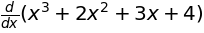

In [89]:
z = x**3+2*x**2+3*x+4
d = Derivative(z,x)
d
d.doit()
d.doit().subs({x:1})
diff(z,x)

#### 求偏导数

In [90]:
z = x**2+2*x*y+3*y**2
d = Derivative(z,x)
d
d.doit()
d.doit().subs({x:1})
d.doit().subs({x:1,y:2})
diff(z,x)
diff(z,y)

#### 高阶导数

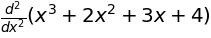

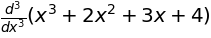

In [91]:
z = x**3+2*x**2+3*x+4
diff(z,x,2)
diff(z,x,3)
Derivative(z,x,2)
Derivative(z,x,3)
Derivative(z,x,2).doit()
Derivative(z,x,3).doit()

#### 最值

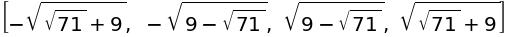

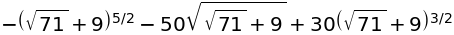

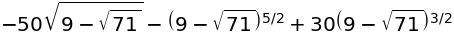

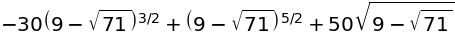

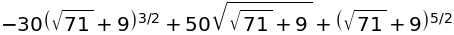

In [92]:
z = x**5-30*x**3+50*x
x_min = -5
x_max = -5
d1 = diff(z,x)
s1 = solve(d1)
s1 = sorted(s1)
s1
z.subs({x:s1[0]})
z.subs({x:s1[1]})
z.subs({x:s1[2]})
z.subs({x:s1[3]})
z.subs({x:s1[0]}).evalf()
z.subs({x:s1[1]}).evalf()
z.subs({x:s1[2]}).evalf()
z.subs({x:s1[3]}).evalf()

## 积分
* Integral
* integrate

In [93]:
from sympy import integrate, Integral

In [94]:
x,y,z = symbols('x y z')

### 不定积分

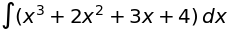

In [95]:
f = x**3+2*x**2+3*x+4
integrate(f, x)
Integral(f, x)
Integral(f, x).doit()

### 定积分

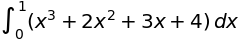

In [96]:
f = x**3+2*x**2+3*x+4
integrate(f,(x,0,1))
Integral(f,(x,0,1))
Integral(f,(x,0,1)).doit()
I

In [97]:
f = exp(-x**2)
integrate(f,(x,-oo,oo))

In [98]:
# 标准正态分布
t = symbols('t')
f = (1/((2*pi)**(0.5))*exp(-t**2/2))
integrate(f,(t,-oo,oo)).evalf()
integrate(f,(t,-oo,x)).evalf()
integrate(f,(t,-oo,0.1)).evalf()
integrate(f,(t,-0.1,0.1)).evalf()

### 二重积分

##### 二重不定积分

In [99]:
f = x+y
integrate(f, x, y)
integrate(f, x, x)
# Integral(f, (x, -oo, oo), (y, -oo, oo)).doit()

##### 二重定积分


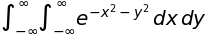

In [100]:
f = exp(-x**2 - y**2)
integrate(f, (x, -oo, oo), (y, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo)).doit()

### 三重积分

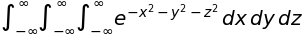

In [101]:
f = exp(-x**2 - y**2 - z**2)
integrate(f, (x, -oo, oo), (y, -oo, oo), (z, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo), (z, -oo, oo))
Integral(f, (x, -oo, oo), (y, -oo, oo), (z, -oo, oo)).doit()

### 概率密度

⎧   2                   
⎪3⋅x                    
⎪────  for x ≥ 1 ∧ x ≤ 2
⎨ 7                     
⎪                       
⎪ 0        otherwise    
⎩                       

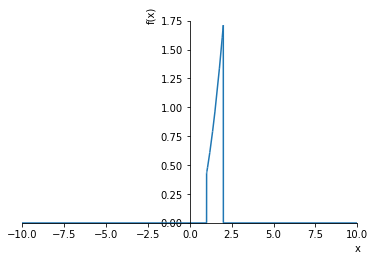

In [102]:
i1 = integrate(x**2,(x,1,2))
f = Piecewise(((1/i1)*x**2,(x>=1) & (x<=2)),(0, True))
f
integrate(f,(x,-oo,oo))
plot(f)

## 级数

### 幂级数

#### 级数展开

In [103]:
from sympy import series, re, im
x = symbols('x')
s = series(exp(I * x), x, 0, 10)
s
print(re(s))
print(im(s))
# re(s) # 级数的实部
# im(s) # 级数的虚部

-re(x)**8*im(x)/40320 + re(x)**8/40320 + re(x)**6*im(x)**3/4320 - re(x)**6*im(x)**2/1440 + re(x)**6*im(x)/720 - re(x)**6/720 - re(x)**4*im(x)**5/2880 + re(x)**4*im(x)**4/576 - re(x)**4*im(x)**3/144 + re(x)**4*im(x)**2/48 - re(x)**4*im(x)/24 + re(x)**4/24 + re(x)**2*im(x)**7/10080 - re(x)**2*im(x)**6/1440 + re(x)**2*im(x)**5/240 - re(x)**2*im(x)**4/48 + re(x)**2*im(x)**3/12 - re(x)**2*im(x)**2/4 + re(x)**2*im(x)/2 - re(x)**2/2 + re(O(x**10)) - im(x)**9/362880 + im(x)**8/40320 - im(x)**7/5040 + im(x)**6/720 - im(x)**5/120 + im(x)**4/24 - im(x)**3/6 + im(x)**2/2 - im(x) + 1
re(x)**9/362880 - re(x)**7*im(x)**2/10080 + re(x)**7*im(x)/5040 - re(x)**7/5040 + re(x)**5*im(x)**4/2880 - re(x)**5*im(x)**3/720 + re(x)**5*im(x)**2/240 - re(x)**5*im(x)/120 + re(x)**5/120 - re(x)**3*im(x)**6/4320 + re(x)**3*im(x)**5/720 - re(x)**3*im(x)**4/144 + re(x)**3*im(x)**3/36 - re(x)**3*im(x)**2/12 + re(x)**3*im(x)/6 - re(x)**3/6 + re(x)*im(x)**8/40320 - re(x)*im(x)**7/5040 + re(x)*im(x)**6/720 - re(x)*im(x)**5

In [104]:
series(cos(x), x, 0, 10) # 10为余项次数

In [105]:
series(sin(x)) # 默认余项次数为6，在 x=0 处展开

In [106]:
series(exp(x), x, 1, n= 3)#在 x=1 处展开，余项次数为3

In [107]:
sin(x).series(x,0,n=4)

#### 级数求和

In [108]:
from sympy import var, summation
i, n = var("i n") # Create symbols and inject them into the global namespace.
summation(i, (i, 1, n)) # summation函数用于级数求和

In [109]:
summation(1/n, (n, 1, +oo)) # 调和级数，发散

In [110]:
r = symbols('r')
summation(1/n**r, (n, 1, +oo)) # 仅当r>1时 收敛

⎧  ζ(r)     for r > 1
⎪                    
⎪  ∞                 
⎪ ___                
⎪ ╲                  
⎨  ╲    -r           
⎪  ╱   n    otherwise
⎪ ╱                  
⎪ ‾‾‾                
⎪n = 1               
⎩                    

### 傅里叶级数

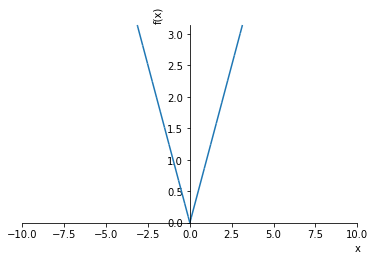

In [111]:
from sympy import fourier_series, plot
f = Piecewise((x,(x>0) & (x<pi)),(-x,(x<0) & (x>-pi)))
plot(f)
fourier_series(f, (x, -pi, pi)).truncate(8)#截断

In [112]:
s = fourier_series(x**2, (x, -pi, pi))
s
s.evalf()
# dir(s)

s.scale(2).truncate() # y幅度
s.scalex(2).truncate() # x幅度
s = fourier_series(x, (x, -pi, pi))
s
s.shift(1).truncate() # y平移
s.shiftx(1).truncate() # x平移

In [113]:
from sympy.integrals import fourier_transform
from sympy.integrals import laplace_transform

f1 = fourier_transform(exp(-x**2), x, k)
f1
f2 = laplace_transform(sin(x),x,f)
f2


⎛⎧  1                                                    ⎞
⎜⎪──────  for (x > 0 ∧ x < π) ∨ (x > -π ∧ x < 0)         ⎟
⎜⎨ 2                                            , 0, True⎟
⎜⎪x  + 1                                                 ⎟
⎝⎩                                                       ⎠

In [114]:
s,t = symbols("s t")
f = exp(-t**2)
f = sin(x)
f
integrate(f*exp(-s*7),(t,0,+oo))

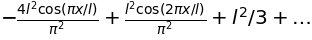

In [115]:
n,l = symbols("n l")
s = fourier_series(x**2, (x, -l, l))
s
s1 = s.subs({l:pi})
s1.truncate(10)

s2 = s1.truncate(100).subs({x:2})
s2.evalf()

# summation(s1,(x,0,+oo))

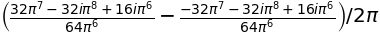

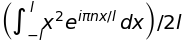

In [116]:
from sympy import I
f = x**2
n,l = symbols("n l")
# n=2
s = (1/(2*l))*integrate(f*exp(n*pi*x*I/l),(x,-l, l))
cn = simplify(s.subs({l:pi}))
sn = cn*exp(n*pi*x*I/l)
s1 = s.subs({l:pi,n:2})
s1
simplify(s1)
(1/(2*l))*Integral(f*exp(n*pi*x*I/l),(x,-l, l))
sn.subs({n:2})

In [117]:
sns = 0
for n_ in range(-100,100):
    sns+=sn.subs({l:pi,x:2,n:n_})
sns.evalf()

In [118]:
e1 = exp(-8*pi*I)
e1

![](https://gss3.bdstatic.com/7Po3dSag_xI4khGkpoWK1HF6hhy/baike/pic/item/b7fd5266d01609246cd3815fd50735fae7cd34fb.jpg)

# 集合
FiniteSet

### 构建集合

In [119]:
from sympy import FiniteSet
from fractions import Fraction # 分数

In [120]:
s = FiniteSet(2,4,6, Fraction(1,5))
s
len(s)
3 in s

False

In [121]:
# 创建一个空集合
s = FiniteSet()
s

In [122]:
# 通过列表或元组创建集合
members= [1,2,3]
s = FiniteSet(*members)
s

##### 集合的重复与排序

In [123]:
s = FiniteSet(2,4,6,2)
s
for s_ in s:
    print(s_)

2
4
6


In [124]:
s1 = FiniteSet(2,4,6)
s2 = FiniteSet(6,4,2)
s1 == s2

True

### 子集、超集与幂集
* 子集: is_subset()
* 超集: is_superset()
* 幂集: powerset()

In [125]:
s = FiniteSet(1)
t = FiniteSet(1,2,3,4)
# 子集
s.is_subset(t)
t.is_subset(s)
# 超集
s.is_superset(t)
t.is_superset(s)
# 幂集
ps = t.powerset()
ps
len(ps)
# 真子集
s.is_proper_subset(t)
# 真超集
t.is_proper_superset(s)

True

False

False

True

True

True

### 集合运算
* 并集和交集  
    * union
    * intersection
* 笛卡尔积
    * *(乘法运算符号)

##### 并集和交集

In [126]:
s = FiniteSet(1,2,3)
t = FiniteSet(2,4,6)
u = FiniteSet(3,5,7)
s.union(t)
s.intersection(t)
# 三个集合的并集
s.union(t).union(u)

##### 笛卡尔积

In [127]:
s = FiniteSet(1,2)
t = FiniteSet(3,4)
p = s*t
p
len(p)
for p_ in p:
    print(p_)

(1, 3)
(1, 4)
(2, 3)
(2, 4)


##### 集合与自身的笛卡尔乘积

In [128]:
s = FiniteSet(1,2)
p = s**3
p
len(p)
for p_ in p:
    print(p_)

(1, 1, 1)
(1, 1, 2)
(1, 2, 1)
(1, 2, 2)
(2, 1, 1)
(2, 1, 2)
(2, 2, 1)
(2, 2, 2)


In [129]:
from sympy import pi
def time_period(length,g):
    T = 2*pi*(length/g)**0.5
    return T
if __name__=='__main__':
    L = FiniteSet(15,18,21,22.5,25)
    g_values = FiniteSet(9.8,9.78,9.83)
    for elem in L*g_values:
        l = elem[0]
        g = elem[1]
        t = time_period(l/100,g)
        print('{0:^15}{1:^15}{2:^15.3f}'.format(float(l),float(g),float(t)))


     15.0           9.78           0.778     
     15.0            9.8           0.777     
     15.0           9.83           0.776     
     18.0           9.78           0.852     
     18.0            9.8           0.852     
     18.0           9.83           0.850     
     21.0           9.78           0.921     
     21.0            9.8           0.920     
     21.0           9.83           0.918     
     22.5           9.78           0.953     
     22.5            9.8           0.952     
     22.5           9.83           0.951     
     25.0           9.78           1.005     
     25.0            9.8           1.004     
     25.0           9.83           1.002     


# 概率

* 均匀分布
    * random.uniform
    * np.random.uniform

###### 估计一个圆的面积

In [130]:
N=0
M=100000
for i in range(M):
    x1 = random.uniform(-1,1)
    y1 = random.uniform(-1,1)
    r1 = x1**2+y1**2
    if r1<=1 :
        N+=1
(N/M)*4

### 文氏图
pip install matplotlib-venn

In [131]:
from matplotlib_venn import venn2,venn2_circles

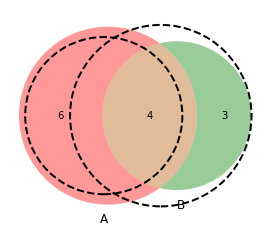

In [132]:
s1 = FiniteSet(*range(1,20,2))
s2 = FiniteSet(*range(1,20,3))
s1
s2
venn2(subsets=[s1,s2], set_labels = ('A', 'B'))
# dir(venn2())
c = venn2_circles(subsets=(1, 2, 2), linestyle='dashed')

### random
* random.shuffle() 方法将序列的所有元素随机排序。
* random.choice() 方法返回一个列表，元组或字符串的随机项。

In [133]:
x1 = list(range(10))
# 复制列表
y1 = x1[:]
z1 = x1.copy()
random.shuffle(x1)
x1
len(x1)
y1
z1
random.choice(x1)

#### 洗牌
* random.shuffle()

In [134]:
# 牌类
class Card:
    def __init__(self,suit,rank):
        self.suit = str(suit)
        self.rank = int(rank)


In [135]:
# 设定牌
suits = FiniteSet(*"ABCD")
suits
ranks = FiniteSet(*range(1,14))
ranks
cards = suits*ranks
cards

In [136]:
cardlist=[]
for i,card in enumerate(cards):
    cardlist.append(Card(card[0],card[1]))

In [137]:
# 洗牌
random.shuffle(cardlist)
# cardlist

### 类列表按属性排序
operator

In [138]:
# 理牌
import operator
cardlist1 = cardlist[:13]
cmpfun = operator.attrgetter('rank')#参数为排序依据的属性，可以有多个，这里优先id，使用时按需求改换参数即可
cardlist1.sort(key=cmpfun)#使用时改变列表名即可
for l1 in cardlist1:
    "{0}{1}".format(l1.suit,l1.rank)

'A1'

'B2'

'C2'

'D2'

'C3'

'D5'

'B5'

'A7'

'C7'

'A9'

'C10'

'A12'

'D12'